# Caleidoscoop IK: informatie-visualisatie opdracht


Je mag deze opdracht in paren maken.
Vul hieronder je namen en studentnummers in:

Naam 1: Jasper Wieten: s3786617

Naam 2: Larisa Bulbaai; s3651258

## Deel 1: Grafiek-kritiek (4pt)

Schrijf voor elk van de volgende grafieken een korte beoordeling (3-6 zinnen) volgens de principes van Tufte. Noem tekortkomingen van de grafiek volgens de theorie zoals behandeld in het hoorcollege: is de grafiek misleidend? verwarrend? afleidend? overbodig? etc. Wat zou je veranderen of wat voor andere grafiek stel je voor?

Voor deze en de volgende opdracht kan je gebruik maken van deze aanwijzingen voor het kiezen van een type grafiek: https://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf

1a. https://www.ft.com/content/3bdc1840-56df-11e9-91f9-b6515a54c5b1

<img src="https://www.ft.com/__origami/service/image/v2/images/raw/http%3A%2F%2Fcom.ft.imagepublish.upp-prod-eu.s3.amazonaws.com%2F436c1df6-57b3-11e9-91f9-b6515a54c5b1?source=next&fit=scale-down&quality=highest&width=700" width=500>

Deze grafiek is bovenal verwarrend/onoverzichtelijk. De lijntjes tussen de aspecten van individuele steden lijken een relatie weer te geven terwijl deze er helemaal niet is. De exacte waarden van de punten in de grafiek zijn ook niet te achterhalen. Er zijn betere tabelsoorten te gebruiken om deze data te tonen; Wij zouden zelf een staafgrafiek aanbevelen. Tot slot zouden de grafieken bij 0 moetne beginnen: Het feit dat de grafieken niet bij 0 beginnen en relatief ongelijk  groeien is erg misleidend voor de lezer.

1b. Bron: https://i.redd.it/4be77xnonqn21.jpg
<img src="https://i.redd.it/4be77xnonqn21.jpg" width=500>

Het grootste probleem met deze grafiek is dat de lengte van de staafgrafieken niet overeen komen met de data die gepresenteerd wordt: De grafiek van 1955 is niet ~4 keer zo lang als die van 1946. Er is een sterke lie-factor. Een ander probleem met de grafiek is dat het niet duidelijk is wat er op de X-axis wordt weergeven: Dit zou het aantal auto's kunnen zijn, maar ook de totale waarde van de auto's of het aantal eigenaren van een (of meer) auto's. Wij denken echter wel dat het gebruik van een staafgrafiek de juiste keuze is.

1c. Bron: https://i.redd.it/8l91d8ezgmp21.jpg

<img src="https://i.redd.it/8l91d8ezgmp21.jpg" width=500>

Deze hele tabel is erg onoverzichtelijk. Je kunt geen waarden binden aan de vlakken van de cirkel (Er wordt ook niet aangegeven wat de werkelijke waarden zijn) en er wordt ook niet aangegeven wat het onderwerp van de tabel is. Het 3D-effect helpt ook niet in de overzichtelijkheid. Zelfs de kleinste bedrijven worden in deze tabel weergegeven en het zou makkelijker een "resterende" categorie bij te maken om de tabel overzichtelijk te houden. Ook hier zou een staafdiagram een betere oplossing zijn.

1d. https://i.redd.it/ncqbjl4qzso21.jpg
<img src="https://i.redd.it/ncqbjl4qzso21.jpg" width=400>

In deze tabel is geen waarde op de x-axis. De waarde op de Y-axis is ook onduidelijk, ook omdat de percentages niet overeen komen met de visuele lijnen (De "standaard" slaap begint bij een negatief percentage).

## Deel 2: Visualisatie van een dataset 

Voor deze opdracht hebben we een visualisatie van een dataset van het CBS ([Centraal Bureau voor Statistiek](https://nl.wikipedia.org/wiki/Centraal_Bureau_voor_de_Statistiek)) gemaakt. de datset biedt inzicht in de snelheid waarmee verschillende groepen van personen die een uitkering ontvangen op grond van de werkloosheidswet (WW-uitkering) opnieuw een baan vinden en uitstromen uit de WW. Ook andere baan- en WW-informatie is opgenomen in de tabel.



In [36]:
import cbsodata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #Toegevoegd om de grafieken labels te kunnen geven etc.
seaborn.set(rc={'figure.figsize':(10, 6)}); seaborn.set_style('ticks')

identifier = '82316NED'


## Preview van de dataset

In [21]:
# downloaden van de dataset
data = pandas.DataFrame(cbsodata.get_data(identifier))
data.head()

AllePersonenIngestroomdInDeWW_1       BaansituatieBijStartWWUitkering  \
0                         369650.0  Totaal bij start van de WW-uitkering   
1                         348170.0  Totaal bij start van de WW-uitkering   
2                         346370.0  Totaal bij start van de WW-uitkering   
3                         422410.0  Totaal bij start van de WW-uitkering   
4                         502690.0  Totaal bij start van de WW-uitkering   

  BaansituatieOpPeilmoment  ID InstroomEnPeilmoment Leeftijdklassen Perioden  \
0                   Totaal   0    Op instroommoment          Totaal     2009   
1                   Totaal   1    Op instroommoment          Totaal     2010   
2                   Totaal   2    Op instroommoment          Totaal     2011   
3                   Totaal   3    Op instroommoment          Totaal     2012   
4                   Totaal   4    Op instroommoment          Totaal     2013   

   PersonenMetAOZWVoorInstroom_3  PersonenMetEenBaanVoorInstroom_2  \
0                        36010.0                          309950.0   
1                        37700.0                          291370.0   
2                        41370.0                          288440.0   
3                        43040.0                          358000.0   
4                        45650.0                          431480.0   

  WWSituatieOpPeilmoment  
0           WW-uitkering  
1           WW-uitkering  
2           WW-uitkering  
3           WW-uitkering  
4           WW-uitkering

##  We hebben de gegevens gecut naar een tabel die alleen de 3 variabelen heeft die we gaan gebruiken.

In [22]:
data = pd.DataFrame(cbsodata.get_data(identifier), columns=['Perioden','PersonenMetAOZWVoorInstroom_3','PersonenMetEenBaanVoorInstroom_2'],)
columns_for_differencing = ['Perioden']
data.head()

Perioden  PersonenMetAOZWVoorInstroom_3  PersonenMetEenBaanVoorInstroom_2
0     2009                        36010.0                          309950.0
1     2010                        37700.0                          291370.0
2     2011                        41370.0                          288440.0
3     2012                        43040.0                          358000.0
4     2013                        45650.0                          431480.0

## We proberen nu een plot te maken van de gegevens


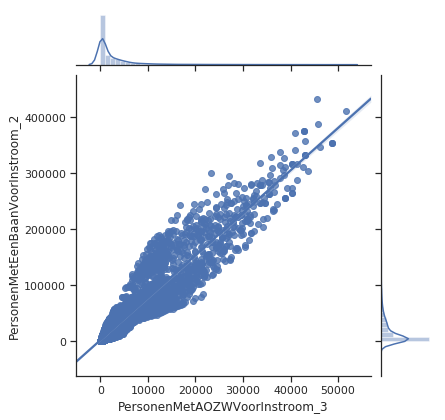

In [23]:
sns.jointplot("PersonenMetAOZWVoorInstroom_3", "PersonenMetEenBaanVoorInstroom_2", data=data, kind='reg');

Zoals te zien is, is deze plot niet overzichtelijk. Hij is heel verwarrend, we kunnen niet echt een relatie zien. En weten niet waar we precies naar moeten kijken.

We willen toch liever een line plot, waar we perioden(jaartallen) op de X-as willen, en Y-as de hoeveelheden mensen. Hiernaast willen we 2lijnen, lijn1 van de personen met een baan voor instroom en lijn2 van de personen met AOZW voor instroom.

We gaan nu eerst een plot maken met lijn1.

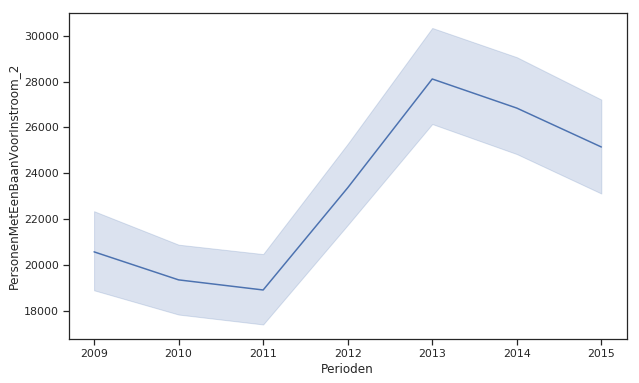

In [31]:
sns.lineplot(
        x='Perioden',
        y='PersonenMetEenBaanVoorInstroom_2',
        data=data);


Nu gaan een plot maken met lijn2.

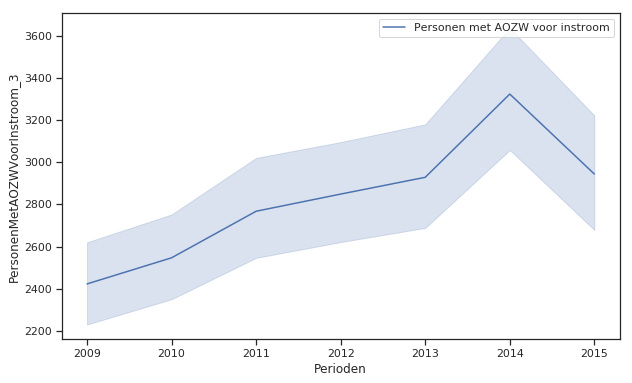

In [27]:
sns.lineplot(x='Perioden',y='PersonenMetAOZWVoorInstroom_3',data=data, label='Personen met AOZW voor instroom',);

We willen deze twee samen in een plot zetten om de verhouding tussen beiden goed te kunnen zien.

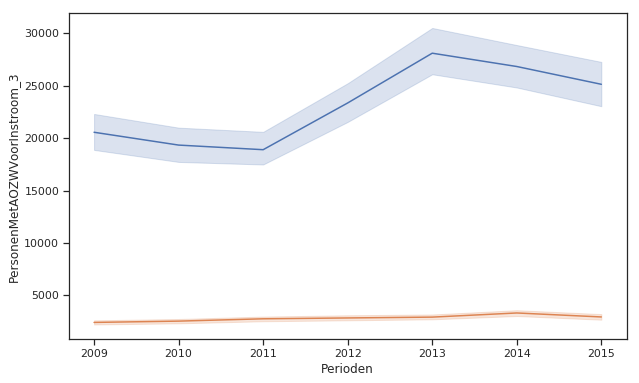

In [32]:
sns.lineplot(x='Perioden',y='PersonenMetEenBaanVoorInstroom_2', data=data);
sns.lineplot(x='Perioden',y='PersonenMetAOZWVoorInstroom_3',data=data);


Dit is heel onoverzichtelijk, we kunnen totaal niet zien welke lijn waarboj hoort. En de Y-as heeft een verkeerde naam.
Hierdoor gaan wij nu de lijnen labels geven en de Y-as een naam.


Text(0, 0.5, 'Hoeveelheid personen')

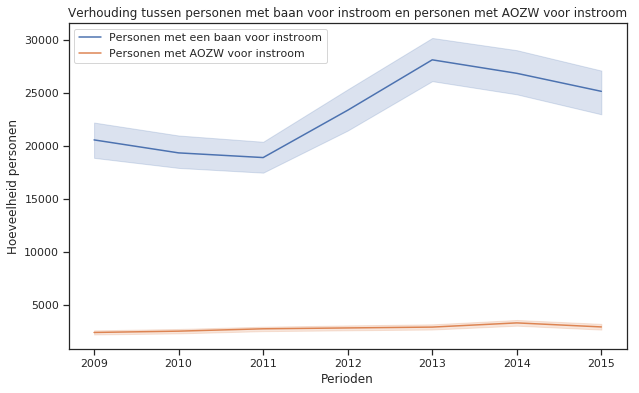

In [37]:
sns.lineplot(x='Perioden',y='PersonenMetEenBaanVoorInstroom_2', data=data, label='Personen met een baan voor instroom',);
sns.lineplot(x='Perioden',y='PersonenMetAOZWVoorInstroom_3',data=data, label='Personen met AOZW voor instroom',);
plt.title('Verhouding tussen personen met baan voor instroom en personen met AOZW voor instroom')
plt.ylabel('Hoeveelheid personen')


Uit de grafiek is te herleiden dat......